# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams.update({'errorbar.capsize': 2})

import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\scvargas\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


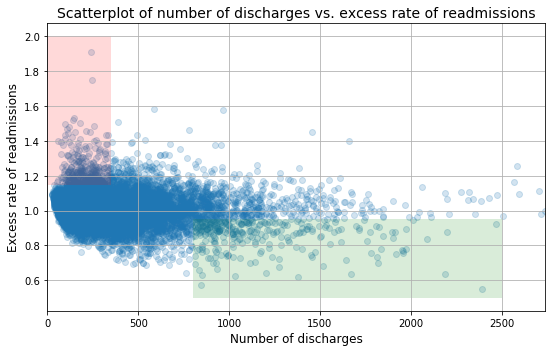

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x1 = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y1 = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x1, y1,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x1)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

A. This report emphasizes and dicusses the correlation of the two variables, excess readmission ratio, and number of discharges. Nevertheless, it does not compute a correlation coefficient, which would have been a simple computation. This statistic could have also manifested if a regression where attempted between the supposedly correlated variables. In addition, the analysis could have included a hypothesis testing, with vanishing correlation as null hypothesis, to support this argument.

This analysis also compares proportions between two subsets of the data for specific ranges of number of discharges: those with less than 100 and those with more than 1000 discharges. While it compares the proportion of abnormal excess readmission ratios for each, a hypothesis testing could have dissipated the possibility of a false-positive for difference of proportions.

The conclusions and recommendations follow direclty from these observations, making it particularly relevant to double check the statements with additional statistics.

Finally, the plot uses shading to try to convey the points made but it does not seem logically placed or particularly convincing. The scatter plot is a bit cluttered. In addition, some data is dropped in the graphical process without mentioning why.

B. Based on the previous comments, we can test for a couple of things. But first, let us see why some data was dropped. While the previous analysis got rid of the 'Not Available' points in 'Number of Discharges', it turns out there are null values in 'Excess Readmission Ratio'. In addition, the three points with highest 'Number of Discharges' may be considered outliers, as it was noticed in the previous analysis:

In [5]:
print(clean_hospital_read_df['Number of Discharges'].isnull().values.any())
print(clean_hospital_read_df['Excess Readmission Ratio'].isnull().values.any())
print(clean_hospital_read_df['Number of Discharges'][-7:])

False
True
1698     2596
1242     2705
8126     2716
6643     2740
1892     3570
13615    3980
13666    6793
Name: Number of Discharges, dtype: int32


We then build a new dataframe that removes these points. In addtion, we will make the type of the data float and sort the sample according to number of discharges:

In [6]:
df = clean_hospital_read_df.loc[:,['Number of Discharges','Excess Readmission Ratio']][pd.notnull(clean_hospital_read_df['Excess Readmission Ratio']) & (clean_hospital_read_df['Number of Discharges'] < 3000)].astype(float).sort_values('Number of Discharges')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 1832 to 6643
Data columns (total 2 columns):
Number of Discharges        11494 non-null float64
Excess Readmission Ratio    11494 non-null float64
dtypes: float64(2)
memory usage: 269.4 KB


The simplest thing we can compute first is the **linear** correlation coefficient between the two variables.

In [8]:
x = df['Number of Discharges'].values
y = df['Excess Readmission Ratio'].values

print(np.corrcoef(x,y)[0,1])

-0.09309554287590445


This is very small, which opposes the conclusions of the previous analysis. This directly reduces our capability of impleting a linear regression between the variables and trust its results at face value. While the correlation coefficient is small, it is not null, which is something we can test for. We can test this indirectly with the following null hypothesis: the slope in a linear regression between these two variables vanishes. As alternate hypothesis we take a non-vanishing slope. The reason why this tests indirectly for vanishing correlation is because the sign of $r$ is the same as the sign of the slope found in the linear correlation. As we mentioned, we already have evidence to not trust the parameters found in the linear correlation, but they will come out of the analysis anyway.

In this case, the size of the sample is large enough to allow a z-test. We will do a t-test anyway, just for practice purposes, and the difference should not be noticeable.

We do this here in 3 ways: 1) we can use the formulas implemented in the following function to compute estimate for y-axis cut, its error, estimate for slope, its error and r coefficient for a linear regression. Then compute $t$ and $p$ values.

In [9]:

def linear_reg_parameters(data_x,data_y):
    """Computes quantities relevant in linear
    regression and hypothesis testing. Returns a
    list with: estimate for y-axis cut, its error,
    estimate for slope, its error and r
    coefficient."""
    
    # Convert to float to avoid bug in np.dot
    data_x = data_x.astype(float)
    data_y = data_y.astype(float)
    
    # Number of pairs of data
    n = len(data_x)
    
    # Means
    x_bar = np.mean(data_x)
    y_bar = np.mean(data_y)
    
    # Sum of x and y data
    sum_x = np.sum(data_x)
    sum_y = np.sum(data_y)
    
    # Sum of squares of z and y data
    sum_x_squared = np.dot(data_x,data_x)
    sum_y_squared = np.dot(data_y,data_y)
    
    # Values for Sxx, Syy and Sxy
    s_xx = np.dot(x-x_bar,x-x_bar)
    s_yy = np.dot(y-y_bar,y-y_bar)
    s_xy = np.dot(x-x_bar,y-y_bar)
    
    # Estimates for slope and y-axis cut
    beta_1 = s_xy / s_xx
    beta_0 = y_bar - beta_1 * x_bar
    
    # Notice the n-2 degrees of freedom in the standard deviation
    SSE = s_yy - beta_1 * s_xy
    s_squared = SSE / (n-2)
    
    # Errors for slope and y-axis cut
    beta_1_error = np.sqrt(s_squared / s_xx)
    beta_0_error = np.sqrt(s_squared * sum_x_squared / (n * s_xx) )
    
    # r coefficient
    r = s_xy / np.sqrt(s_xx * s_yy)
    
    return [beta_0, beta_0_error, beta_1, beta_1_error, r]

In [10]:
xy_params = linear_reg_parameters(x,y)
print('slope =', xy_params[2], ', slope error =', xy_params[3], ', intercept =', xy_params[0], ', intercept error =', xy_params[1], ', r = ', xy_params[4], ', r^2 = ', xy_params[4]**2)

slope = -2.856505294382263e-05 , slope error = 2.8498248278499884e-06 , intercept = 1.0179475579544222 , intercept error = 0.0013440927111226957 , r =  -0.0930955428759044 , r^2 =  0.008666780103359353


In [11]:
n = len(x)

t = xy_params[2]/xy_params[3]

p_val = stats.t.sf(abs(t), n-2)*2
                        
t_alpha = stats.t.ppf(.995, n-2)

print('t = ', t,', p =' ,p_val,', t_alpha =', t_alpha,
      ', confidence interval with alpha sig =', xy_params[2] - t_alpha * xy_params[3],
      ',', xy_params[2] + t_alpha * xy_params[3])

t =  -10.023441674263589 , p = 1.502275642661509e-23 , t_alpha = 2.5762571939479226 , confidence interval with alpha sig = -3.5906934658062566e-05 , -2.1223171229582698e-05


2) We can use the scipy.stats way:

In [12]:
stats.linregress(x,y)

LinregressResult(slope=-2.8565052943822644e-05, intercept=1.0179475579544222, rvalue=-0.09309554287590445, pvalue=1.5022756426614328e-23, stderr=2.849824827849988e-06)

3) We can obtain bootstrap replicates for the correlation coeficient assuming the null hypothesis: this means we have to destroy the correlation by sampling ramdomly from the data sets, then compute correlations and estimate the $p$-value:

In [13]:
def draw_bs_pairs_replicates_null(x, y, func, size=1):
    """Performs pairs bootstrap destroying correlation and computes a single statistic on the pairs samples."""

    # Initialize replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_x, bs_y = np.random.choice(x, size=len(x)), np.random.choice(y, size=len(y))
        bs_replicates[i] = func(bs_x, bs_y)
    
    return bs_replicates

def correl(x, y):
    return np.corrcoef(x, y)[0,1]

In [16]:
corr_reps = draw_bs_pairs_replicates_null(x, y, correl, 100000)

p_boots = np.sum(np.absolute(corr_reps) >= np.absolute(np.corrcoef(x, y)[0,1]))/len(corr_reps)

print( 'p_boots =', p_boots)

p_boots = 0.0


As we can see, all methods show the null correlation should be rejected, even for the level of significance of 0.01. Then the correlation, while very small, is not null.

A second test we can implement is the difference of proportions between the two subsets discussed in the analysis: those with less than 100 and those with more than 1000 discharges. The null hypothesis is for the two sets to share a common proportion of abnormal excess readmission ration. The alternative hypothesis corresponds to the observed scenario of the smaller hospitals having a higher proportion. To do this we first select the data:

In [17]:
data_a = df['Excess Readmission Ratio'][df['Number of Discharges']<100].values
data_b = df['Excess Readmission Ratio'][df['Number of Discharges']>1000].values

The means of the two sets are as indicated in the analysis.

In [18]:
print(np.mean(data_a),np.mean(data_b))

1.02261835016835 0.9790730434782609


For simplicity we build binary arrays with 1 for abnormal ERR and 0 otherwise:

In [19]:
data_a_bin = np.array([ (1 if xi > 1 else 0) for xi in data_a])
data_b_bin = np.array([ (1 if xi > 1 else 0) for xi in data_b])

The number of succeses and failures is large in both sets so we are free to run a z-test.

In [20]:
n1 = len(data_a_bin)

s1 = sum(data_a_bin)

n2 = len(data_b_bin)

s2 = sum(data_b_bin)

print('Size of set 1 =', n1,', Number of successes in set 1 =', s1,
      ', Size of set 2 =', n2,', Number of successes in set 2 =', s2)

p1 = s1/n1

p2 = s2/n2

standard_error = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)

z = (p1 - p2)/standard_error

p_val = stats.norm.sf(abs(z))

z_alpha = stats.norm.ppf(.99)

lower_confidence_bound = p1 - p2 - z_alpha * standard_error

print('Proportion 1 = ',p1,', Proportion 2 = ',p2,
      ', Oberved difference of proportions = ',p1-p2,
    ', Standard Error = ',standard_error,', z = ',z,', p =',p_val,
      ', z_alpha = ',z_alpha,', Lower Confidence Bound =', lower_confidence_bound)

Size of set 1 = 1188 , Number of successes in set 1 = 751 , Size of set 2 = 460 , Number of successes in set 2 = 205
Proportion 1 =  0.6321548821548821 , Proportion 2 =  0.44565217391304346 , Oberved difference of proportions =  0.18650270824183868 , Standard Error =  0.02707016455868527 , z =  6.889603786394443 , p = 2.797399706560721e-12 , z_alpha =  2.3263478740408408 , Lower Confidence Bound = 0.12352808847080549


As we see, we have to reject the hypothesis of equal proportions. The minimal possible difference of proportions consistent with the level of significance is about 12.3%, which suggests that the 'larger' and 'smaller' hospitals indeed seem to manifest the difference ERR indicated in the analysis.

4. As we mentioned, we found a very small but not vanishing correlation and a significant difference of proportions of abnormal ERR between large and a small hospitals. It is interesting to see how these two statements are both true. We would argue that the evidence points to an absence of a significant **linear** correlation. The observation about the difference of proportions, which exists, can not be deduced from a linear model. In this case, the level of significance was in a completely different order of magnitude than that one found in the $p$-values, which were practicaly null. Hence, the standard ranges of level of significance (0.01 to 0.05) would have both lead to the same conclusion. We also foun $r^2$ to be lower than $\alpha$ either way. Nevertheless, the difference of proportions might be enough evidence to justify the recommendations in the analysis, which mostly point to encourage smaller hospitals in particular to reduce their ERR. 

5. As we mentioned, the scatter plot in the analysis used odd shadings and was a bit cluttered. On the other hand, it does show the totallity of the selected data and, after all, a scatter plot is often be useful in the process of finding a trend. Here we propose two possible imporvements. If the intention is to show all the data, we propose to reduce the cluttering by using an exponential scale in the x axis. We also remove the shadings and grid, and distinguish the data with abnormal ERR with red and the other with green.

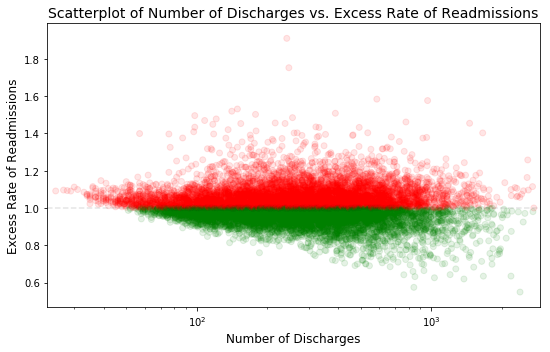

In [21]:
col_scatt = lambda y : 'red' if y > 1 else 'green'
cols = [ col_scatt(i) for i in df['Excess Readmission Ratio'].values ]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x= df['Number of Discharges'], y=df['Excess Readmission Ratio'], c= cols, alpha = 0.1)
ax.set_xlabel('Number of Discharges', fontsize=12)
ax.set_ylabel('Excess Rate of Readmissions', fontsize=12)
ax.set_title('Scatterplot of Number of Discharges vs. Excess Rate of Readmissions', fontsize=14)
ax.axhline(1, linestyle='--', color='black', alpha = 0.1)
ax.set_xscale('log')
ax.set_xlim([23, 2900])
fig.tight_layout()
#fig.savefig("foo.pdf", bbox_inches='tight')

A second proposal is to stick with the scatter plot but partially aggreagate the data. We do this by selecting sets of similar number of discharges and concatenating the datapoints. We pick 'bin sizes' of 100 discharges: so the first sample is all data with 100 discharges of less, the second sample is all the data with a number of discharges between 100 and 200, and so on. We then plot the medians of these subsamples together with their interquartile ranges. We pick medians instead of means to minimize the effect of outliers. To deal with the slicing, we first define a percentile function that can act directly on the columns of dataframes:

In [22]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

We create a new column in the dataframe that corresponds to the 'bin label' and then we group by it. We aggregate producing simultaneously the mean, median, standard deviation, 25-percentile and 75-percentile of the subsets:

In [23]:
bin_size = 100

df['Number of Discharges Grouped'] = (df['Number of Discharges']//bin_size)*bin_size + bin_size/2

df2 = df.groupby('Number of Discharges Grouped')
df3 = df2['Excess Readmission Ratio'].agg([np.mean, np.median, np.std, percentile(25), percentile(75)]).reset_index().rename(columns={'mean': 'Mean','median': 'Median','std':'Standard_Deviation','percentile_25':'Percentile_25','percentile_75':'Percentile_75'})

df3.head()

,Number of Discharges Grouped,Mean,Median,Standard_Deviation,Percentile_25,Percentile_75
0,50.0,1.022618,1.01775,0.057979,0.984900,1.052925
1,150.0,1.011768,1.00140,0.083556,0.956400,1.054700
2,250.0,1.012771,1.00430,0.091669,0.951350,1.061350
3,350.0,1.004387,0.99870,0.093112,0.945100,1.058750
4,450.0,1.004151,1.00130,0.097220,0.942575,1.061400


Now we can plot the desired information:

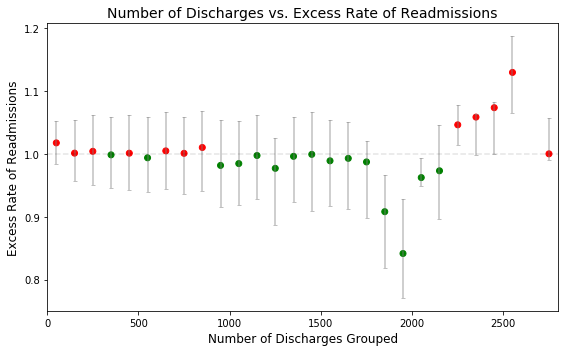

In [24]:
cols2 = [ col_scatt(i) for i in df3['Median'].values ]

err_low = df3['Median'].values - df3['Percentile_25'].values
err_high = df3['Percentile_75'].values - df3['Median'].values

fig, ax = plt.subplots(figsize=(8,5))
ax.errorbar(x = df3['Number of Discharges Grouped'], y = df3['Median'], yerr=[err_low,err_high], ecolor='grey', alpha = 0.5, linestyle = 'None')
ax.scatter(x = df3['Number of Discharges Grouped'], y = df3['Median'], c = cols2, s=36)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions')
ax.set_xlabel('Number of Discharges Grouped', fontsize=12)
ax.set_ylabel('Excess Rate of Readmissions', fontsize=12)
ax.set_title('Number of Discharges vs. Excess Rate of Readmissions', fontsize=14)
ax.axhline(1, linestyle='--', color='black', alpha = 0.1)
ax.set_xlim([0, 2800])
fig.tight_layout()
#fig.savefig("foo.pdf", bbox_inches='tight')

Note: In principle this last plot could have been a box plot but the the author and the boxplot function were not in good terms for some reason.